# Crawling Twitter Using Twint
Twint adalah library python yang difungsikan untuk crawling data timeline di twitter dengan cara yang sangat mudah dan simpel.

Karena kodingan ini dibuat di colab oleh karena itu kita sambungkan terlebih dahulu ke google drive kita.

Hubungkan colab ke google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [6]:
%cd drive/MyDrive/webmining/TugasWebmining/

/content/drive/MyDrive/webmining/TugasWebmining


instalasi twint. lebih jelasnya dapat dilihat di link yang akan di cloning

In [7]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt
!pip install twint
!pip install aiohttp==3.7.0
import twint
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

fatal: destination path 'twint' already exists and is not an empty directory.
/content/drive/MyDrive/webmining/TugasWebmining/twint
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/webmining/TugasWebmining/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 263 kB 36.9 MB/s 
     |████████████████████████████████| 384 kB 50.5 MB/s 
     |████████████████████████████████| 288 kB 45.7 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 
     |████████████████████████████████| 140 kB 70.5 MB/s 
     |██████████████

cek, apakah kita sudah berada di direktori yang diinginkan

In [8]:
!pwd

/content/drive/MyDrive/webmining/TugasWebmining/twint


Konfigurasi crawling dengan twint

In [ ]:
# c = twint.Config()
# c.Search = '#percumalaporpolisi'
# c.Pandas = True
# c.Limit = 60
# c.Store_csv = True
# c.Custom["tweet"] = ["tweet"]
# c.Output = "dataset.csv"
# twint.run.Search(c)

In [9]:
import pandas as pd

In [10]:
import random
read_file = pd.read_csv ('dataset.csv')
# label = ['positif','netral','negatif']
# data = []
# for i in range(read_file.size):
#   rand = random.randint(0,2)
#   data.append(label[rand])
# read_file.insert(1,"label",data, True)
# pd.DataFrame(read_file).to_csv('dataset.csv')
print(read_file)

    Unnamed: 0                                              tweet    label
0            0  Apa hubungan @Mencaricinta99 dengan @musniumar...  negatif
1            1  @memorysongs2022 @KepaArgawinata @DivHumas_Pol...  positif
2            2  hey bung gimana kabar sekarang wkwkw #Bjorka  ...  negatif
3            3     @1ndonesiaku_ @NajwaShihab #percumalaporpolisi  positif
4            4        @mks_fess Makassar info #percumalaporpolisi  positif
..         ...                                                ...      ...
66          66  Haduh....hastag #percumalaporpolisi viral lagi...  positif
67          67  Lagi, laporan terhadap kasus Perlindungan pada...   netral
68          68  hastag #percumalaporpolisi terkait dengan Perl...   netral
69          69               @txtdrberseragam #Percumalaporpolisi  negatif
70          70  Viral lagi nih hastag #percumalaporpolisi. Gar...   netral

[71 rows x 3 columns]


In [11]:
read_file.to_excel (r'dataset.xlsx', index = None, header=True)
data = pd.read_excel('dataset.xlsx')
data

,Unnamed: 0,tweet,label
0,0,Apa hubungan @Mencaricinta99 dengan @musniumar...,negatif
1,1,@memorysongs2022 @KepaArgawinata @DivHumas_Pol...,positif
2,2,hey bung gimana kabar sekarang wkwkw #Bjorka ...,negatif
3,3,@1ndonesiaku_ @NajwaShihab #percumalaporpolisi,positif
4,4,@mks_fess Makassar info #percumalaporpolisi,positif
...,...,...,...
66,66,Haduh....hastag #percumalaporpolisi viral lagi...,positif
67,67,"Lagi, laporan terhadap kasus Perlindungan pada...",netral
68,68,hastag #percumalaporpolisi terkait dengan Perl...,netral
69,69,@txtdrberseragam #Percumalaporpolisi,negatif


In [12]:
!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 25.7 MB/s 


In [38]:
import pandas as pd
import re
import numpy as np

import nltk
nltk.download('punkt')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
def remove_stopwords(text):
    with open('/content/drive/MyDrive/webmining/stopword.txt') as f:
        stopwords = f.readlines()
        stopwords = [x.strip() for x in stopwords]
    
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]
                     
    return text


In [40]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    result = [stemmer.stem(word) for word in text]
    
    return result

In [41]:
def preprocessing(text):
    #case folding
    text = text.lower()

    #remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")

    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    #replace weird characters
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace('-', ' ')

    #tokenization and remove stopwords
    text = remove_stopwords(text)

    #remove punctuation    
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]  

    #stemming
    text = stemming(text)

    #remove empty string
    text = list(filter(None, text))
    return text

In [42]:
data['tweet'].apply(preprocessing).to_csv('preprocessing.csv')

In [43]:
pd.read_csv('preprocessing.csv')

,Unnamed: 0,tweet
0,0,"['hubung', 'analisa', 'linier', 'sebar', 'beri..."
1,1,['polri']
2,2,"['hey', 'gimana', 'kabar', 'wkwkw']"
3,3,[]
4,4,"['fess', 'makassar', 'info']"
...,...,...
66,66,"['haduh', 'hastag', 'viral', 'lindung', 'anak'..."
67,67,"['lapor', 'lindung', 'anak', 'ga', 'gubris', '..."
68,68,"['hastag', 'kait', 'lindung', 'anak', 'nih', '..."
69,69,[]


In [44]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
dataTextPre = pd.read_csv('/content/drive/MyDrive/webmining/TugasWebmining/twint/preprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])

In [45]:
matrik_vsm=bag.toarray()
matrik_vsm.shape

(71, 266)

In [46]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0])

In [47]:
a=vectorizer.get_feature_names_out()

In [48]:
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

,2ini,abai,adek,ae,aja,ajab,alamat,alih,allah,aman,...,viralkan,wa,wajib,wanita,wkwkw,wujud,ya,yg,yuk,yuuk
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
label = pd.read_excel('/content/drive/MyDrive/webmining/TugasWebmining/twint/dataset.xlsx')
dj = pd.concat([dataTF.reset_index(), label["label"]], axis=1)
dj

,"(index,)","(2ini,)","(abai,)","(adek,)","(ae,)","(aja,)","(ajab,)","(alamat,)","(alih,)","(allah,)",...,"(wa,)","(wajib,)","(wanita,)","(wkwkw,)","(wujud,)","(ya,)","(yg,)","(yuk,)","(yuuk,)",label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,negatif
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,negatif
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,positif
67,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,netral
68,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,netral
69,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif


In [50]:
dj['label'].unique()

array(['negatif', 'positif', 'netral'], dtype=object)

In [51]:
dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Columns: 268 entries, ('index',) to label
dtypes: int64(267), object(1)
memory usage: 148.8+ KB


In [52]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dj.drop(labels=['label'], axis=1),
    dj['label'],
    test_size=0.3,
    random_state=0)

In [54]:
y_train

2     negatif
40    negatif
11    negatif
3     positif
54    negatif
45    negatif
10     netral
41    negatif
49    positif
53    negatif
57    positif
32     netral
14     netral
68     netral
19     netral
29     netral
52    positif
35    positif
18     netral
0     negatif
15    positif
5     positif
16    positif
20    negatif
66    positif
8     negatif
13    positif
25     netral
37    positif
17     netral
60    positif
46    negatif
63    positif
39     netral
38     netral
1     positif
58     netral
12    positif
61    negatif
24    negatif
6     negatif
23     netral
36     netral
21    positif
9      netral
67     netral
64    positif
47    negatif
44    positif
Name: label, dtype: object

In [55]:
X_train

,"(index,)","(2ini,)","(abai,)","(adek,)","(ae,)","(aja,)","(ajab,)","(alamat,)","(alih,)","(allah,)",...,"(viralkan,)","(wa,)","(wajib,)","(wanita,)","(wkwkw,)","(wujud,)","(ya,)","(yg,)","(yuk,)","(yuuk,)"
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11,12,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,55,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
45,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,11,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
41,42,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
49,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.03611651, 0.21821696, 0.        ,
       0.14343605, 0.08648881, 0.        , 0.08080177, 0.02645569,
       0.03006626, 0.        , 0.        , 0.0867079 , 0.        ,
       0.        , 0.        , 0.        , 0.0022919 , 0.        ,
       0.        , 0.11225626, 0.0809311 , 0.04057749, 0.        ,
       0.13775625, 0.03154197, 0.        , 0.        , 0.0302906 ,
       0.0139378 , 0.06388279, 0.14043257, 0.04699695, 0.12969039,
       0.        , 0.        , 0.05011215, 0.        , 0.        ,
       0.13792206, 0.        , 0.08100562, 0.05971193, 0.        ,
       0.        , 0.        , 0.05478203, 0.05401959, 0.00800728,
       0.02151021, 0.        , 0.00950431, 0.0539303 , 0.        ,
       0.        , 0.        , 0.03843745, 0.        , 0.        ,
       0.00464435, 0.        , 0.        , 0.04439329, 0.        ,
       0.04839864, 0.        , 0.0563077 , 0.        , 0.07778681,
       0.        , 0.02471008, 0.00133901, 0.02686586, 0.     

In [57]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

(adek,)       0.218217
(listyo,)     0.184207
(kira2,)      0.182385
(mbak,)       0.156989
(percaya,)    0.152506
                ...   
(motekin,)    0.000000
(msh,)        0.000000
(gara2,)      0.000000
(gak,)        0.000000
(index,)      0.000000
Length: 267, dtype: float64

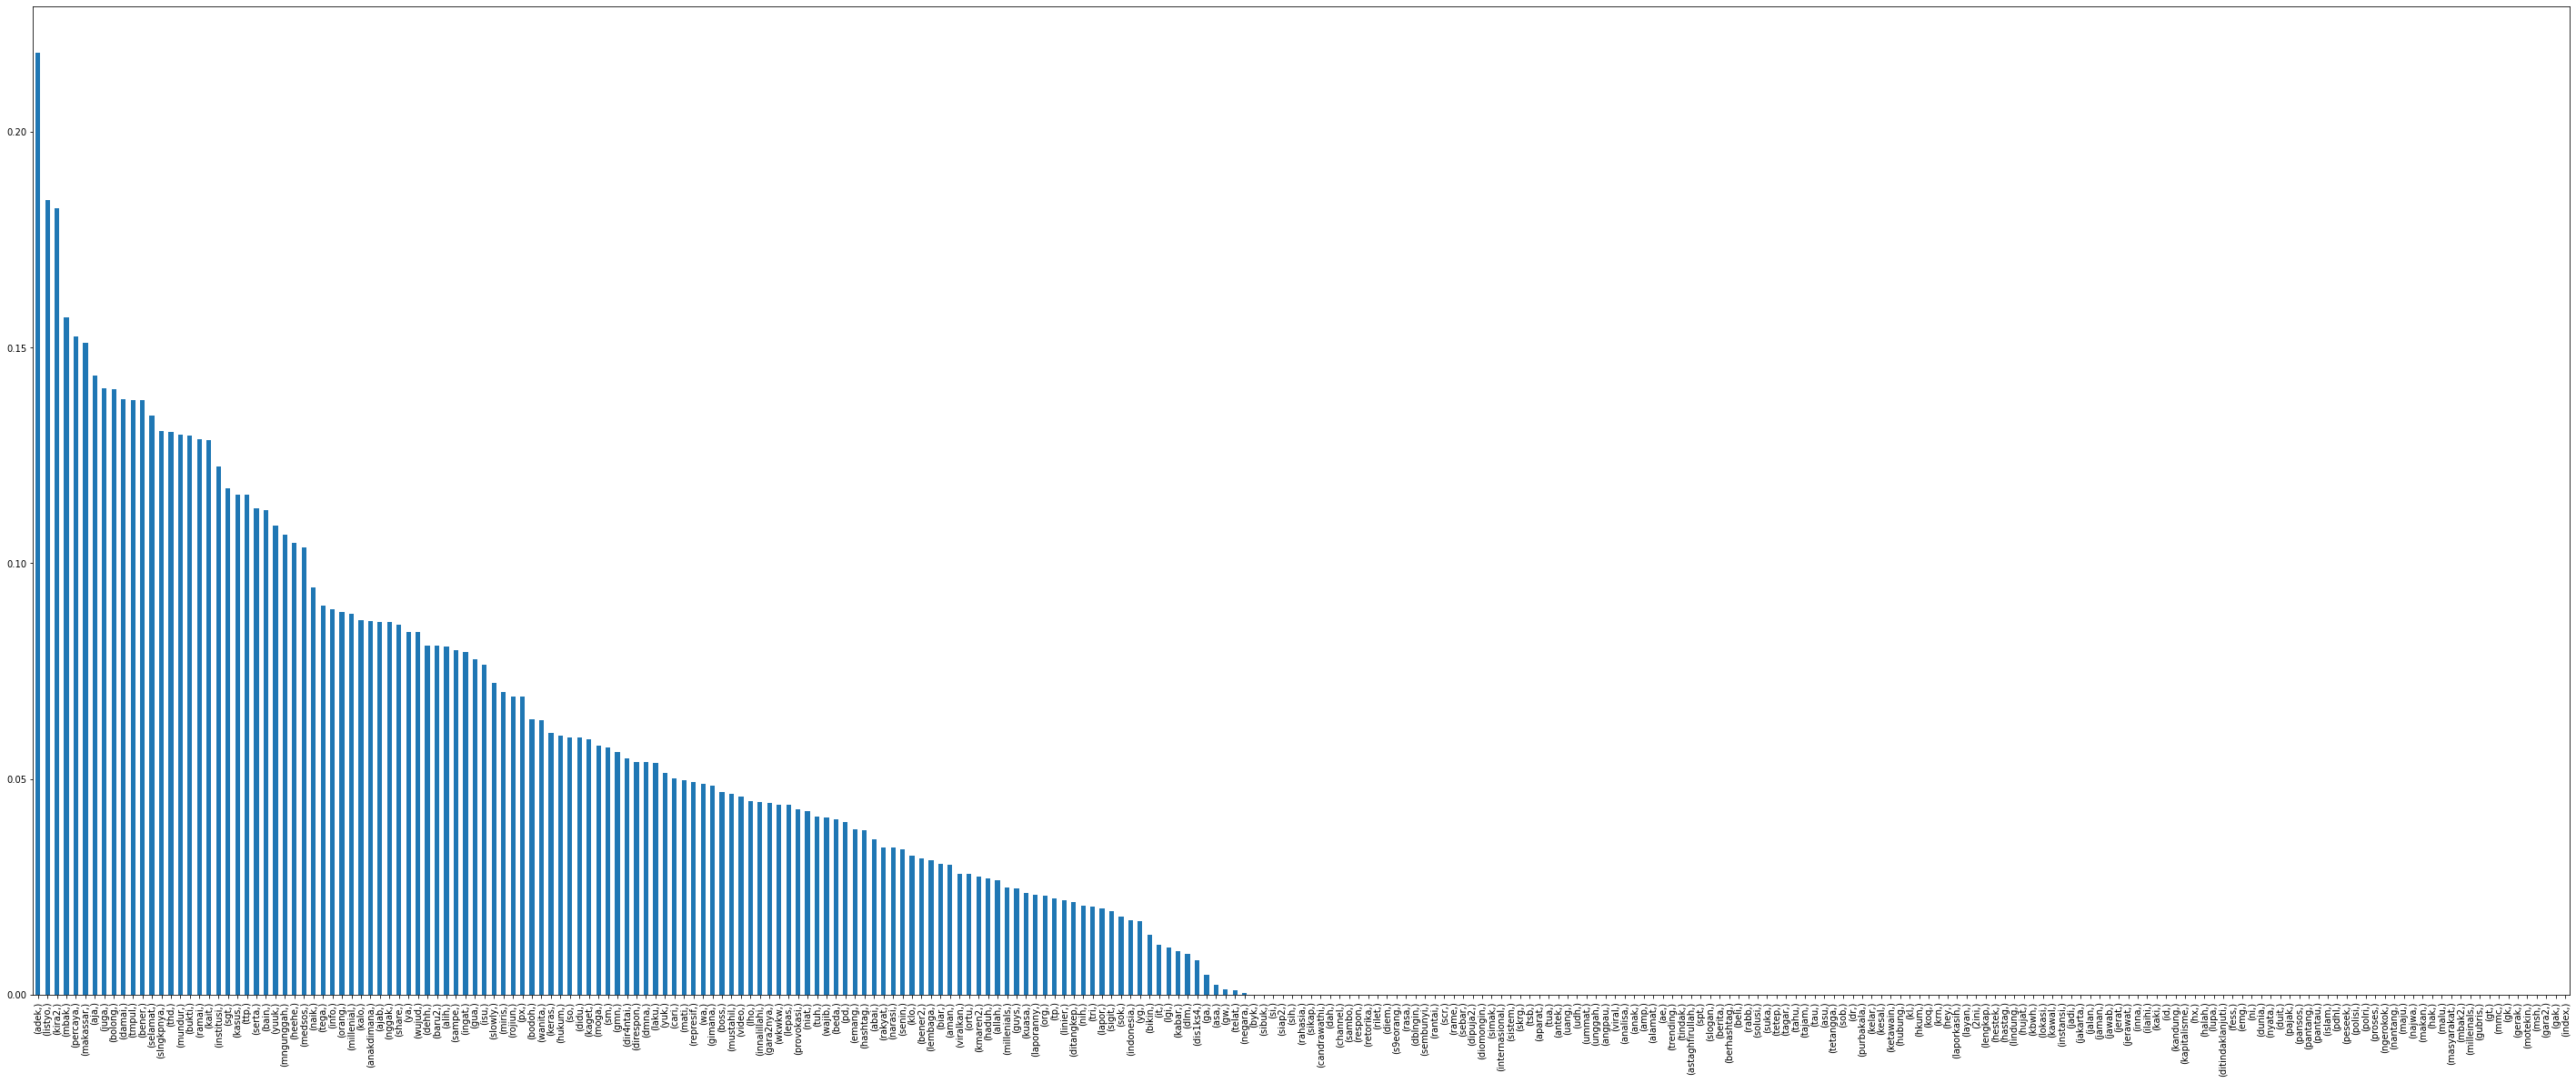

In [58]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(50, 20))


In [59]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=100)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Index([           ('2ini',),          ('alamat',),            ('alih',),
                  ('aman',),           ('antek',),            ('bain',),
                  ('beli',),          ('berita',),          ('bolong',),
                  ('boss',),            ('didu',),       ('diomongin',),
               ('dipuja2',),        ('dir4ntai',), ('ditindaklanjuti',),
                 ('dunia',),             ('emg',),              ('gk',),
                    ('gw',),          ('hestek',),           ('hujat',),
                    ('id',),       ('indonesia',),            ('info',),
                  ('inna',),   ('internasional',),           ('islam',),
                  ('jadi',),           ('jalan',),         ('jerawat',),
                 ('kabar',),            ('kaki',),         ('kandung',),
                 ('kawal',),            ('kbwh',),           ('kelar',),
                 ('keras',),           ('kira2',),         ('kmaren2',),
                   ('krn',),       ('laporanny',), 

Prediksi Dengan Clustering

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(dataTF)
prediksi = kmeans.predict(dataTF)
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [61]:
prediksi


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       2, 2, 0, 0, 2], dtype=int32)

In [62]:
pd.DataFrame(prediksi,columns=['Cluster'])

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
66,2
67,2
68,0
69,0
